## using Morse potential

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

import sympy

In [2]:
def morse(r, D, a, r_e):
    return D * np.power(1 - np.power(np.e, -a * (r - r_e)), 2)

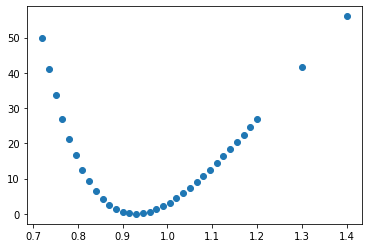

In [3]:
# dat = """0.60000000 -100.16346911
# 0.61500000 -100.20218643
# 0.63000000 -100.23650420
# 0.64500000 -100.26688924
# 0.66000000 -100.29375354
# 0.67500000 -100.31746308
# 0.69000000 -100.33834042
# 0.70500000 -100.35667119
dat = """0.72000000 -100.37271334
0.73500000 -100.38670147
0.75000000 -100.39884400
0.76500000 -100.40932655
0.78000000 -100.41831382
0.79500000 -100.42595322
0.81000000 -100.43237930
0.82500000 -100.43771382
0.84000000 -100.44206521
0.85500000 -100.44553112
0.87000000 -100.44819929
0.88500000 -100.45014881
0.90000000 -100.45145231
0.91500000 -100.45217621
0.93000000 -100.45238025
0.94500000 -100.45211776
0.96000000 -100.45143683
0.97500000 -100.45038093
0.99000000 -100.44898953
1.00500000 -100.44729878
1.02000000 -100.44534179
1.03500000 -100.44314866
1.05000000 -100.44074656
1.06500000 -100.43815995
1.08000000 -100.43541108
1.09500000 -100.43252014
1.11000000 -100.42950563
1.12500000 -100.42638455
1.14000000 -100.42317241
1.15500000 -100.41988328
1.17000000 -100.41652993
1.18500000 -100.41312390
1.20000000 -100.40967556
1.30000000 -100.38619971
1.40000000 -100.36307046""".split('\n')
# 1.50000000 -100.34134612
# 1.60000000 -100.32147709
# 1.70000000 -100.30355472
# 1.80000000 -100.28755085
# 1.90000000 -100.27341251
# 2.00000000 -100.26094819
# 2.10000000 -100.24997433
# 2.20000000 -100.24034566
# 2.30000000 -100.23191021
# 2.40000000 -100.22458045
# 2.50000000 -100.21826310
# 2.60000000 -100.21277720
# 2.70000000 -100.20806786
# 2.80000000 -100.20411952
# 2.90000000 -100.20077045
# 3.00000000 -100.19786569
# 3.10000000 -100.19551633
# 3.20000000 -100.19347838
# 3.30000000 -100.19169822
# 3.40000000 -100.19018273
# 3.50000000 -100.18889901
# 3.60000000 -100.18781084
# 3.70000000 -100.18688003
# 3.80000000 -100.18607544
# 3.90000000 -100.18537842
# 4.00000000 -100.18477791
# 4.10000000 -100.18426620
# 4.20000000 -100.18383642
# 4.30000000 -100.18348139
# 4.40000000 -100.18319354
# 4.50000000 -100.18296610""".split('\n')
dat = [row.split() for row in dat]
bond_length = np.array([float(row[0]) for row in dat])
energy = [float(row[1])*627.5 for row in dat]
min_energy = min(energy)
energy = np.array([e - min_energy for e in energy])

plt.scatter(bond_length, energy)
plt.show()

In [4]:
D_range = range(100, 200, 10)
a_range = np.arange(0.5, 1.5, 0.1)
r_e_range = np.arange(0.5, 1.5, 0.1)

params = []
for D in D_range:
    for a in a_range:
        for r_e in r_e_range:
            pred_e = [morse(r, D, a, r_e) for r in bond_length]
            mse = np.sqrt(mean_squared_error(energy, pred_e))
            params.append((mse, D, a, r_e))

params = sorted(params, key=lambda x: x[0])
params[0]

(8.651214372827818, 190, 1.4, 0.9999999999999999)

74.84351012462263


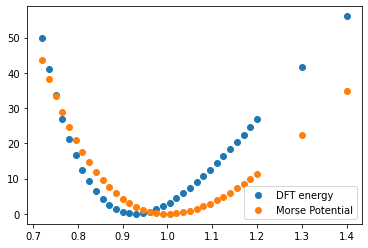

In [5]:
best_params = params[0]
D = best_params[1]
a = best_params[2]
r_e = best_params[3]

pred_e = pred_e = [morse(r, D, a, r_e) for r in bond_length]

print(mean_squared_error(energy, pred_e))

plt.scatter(bond_length, energy, label='DFT energy')
plt.scatter(bond_length, pred_e, label='Morse Potential')
plt.legend()
plt.show()

In [6]:
D_range = range(160, 200, 1)
a_range = np.arange(1.2, 1.6, 0.01)
r_e_range = np.arange(0.8, 1.2, 0.01)

params = []
for D in D_range:
    for a in a_range:
        for r_e in r_e_range:
            pred_e = [morse(r, D, a, r_e) for r in bond_length]
            mse = np.sqrt(mean_squared_error(energy, pred_e))
            params.append((mse, D, a, r_e))

params = sorted(params, key=lambda x: x[0])
params[0]

(3.7181650303252622, 199, 1.6000000000000003, 0.9500000000000002)

13.82475119273366


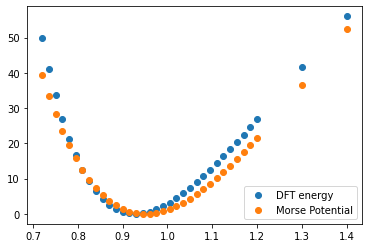

In [7]:
best_params = params[0]
D = best_params[1]
a = best_params[2]
r_e = best_params[3]

pred_e = pred_e = [morse(r, D, a, r_e) for r in bond_length]

print(mean_squared_error(energy, pred_e))

plt.scatter(bond_length, energy, label='DFT energy')
plt.scatter(bond_length, pred_e, label='Morse Potential')
plt.legend()
plt.show()

## learning symbolic regression

In [8]:
import pandas as pd

from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import sympy

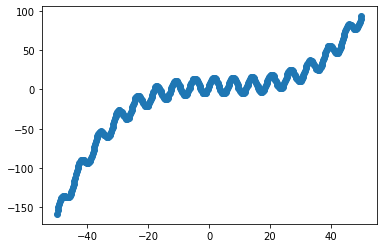

In [38]:
nsample = 400
sig = 0.2
x = np.linspace(-50, 50, nsample)
X = np.column_stack((x/5, 10*np.sin(x), (x-5)**3, np.ones(nsample)))
beta = [0.01, 1, 0.001, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
df = pd.DataFrame()
df['x']=x
df['y']=y

plt.scatter(x, y)
plt.show()

In [40]:
X = df[['x']]
y = df['y']
y_true = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']
model = SymbolicRegressor(
    population_size=5000,
    function_set=function_set,
    generations=40,
    stopping_criteria=0.01,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=0,
    feature_names=X_train.columns
)

In [56]:
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sympy.sin(x),
    'cos': lambda x    : sympy.cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow3': lambda x: x**3
}

In [46]:
model.fit(X_train, y_train)
print('R2:',model.score(X_test, y_test))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.94           3204.3       26          16.2824          24.3847     54.58s
   1    11.69          515.105       11          15.9211          26.2555     51.04s
   2     9.03          77.8841        5          15.6414          34.1542     51.43s
   3     8.80          64.9887        8          15.7102          27.8556     45.40s
   4     8.66          51.2491        9          15.5307          30.6203     44.07s
   5     9.28          58.3982       10          15.2354          33.5407     45.81s
   6     9.49          47.6819       23          15.6452          28.6469     43.51s
   7     9.66          65.5575       18          15.5831          28.5183     46.61s
   8     9.18          56.4732       17          15.3856          31.3633  

In [61]:
next_e = sympy.sympify(str((model._program)), locals=converter)
next_e

0.257471264367816*x*sin(0.116*x) + 1.14942528735632*x - 12.6436781609195*sin(0.112*x) - 1.14942528735632*sin(0.116*x) + 6.74712643678161*sin(x) - 1.14942528735632*sin(0.116*x - 1/x) + 2.29885057471264*sin(sin(x)) + 4.59770114942529*cos(0.112*x) - 2.37868816105918

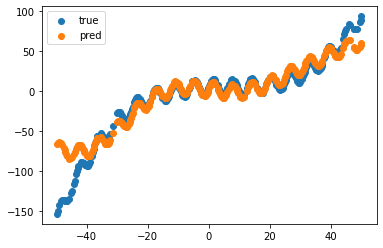

In [66]:
y_train_pred = model.predict(X_train)
plt.scatter(X_train, y_train, label='true')
plt.scatter(X_train, y_train_pred, label='pred')
plt.legend()
plt.show()

In [67]:
def pow_3(x1):
    return x1**3
pow_3 = make_function(function=pow_3,name='pow3',arity=1)

# add the new function to the function_set
function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv', pow_3]
model = SymbolicRegressor(
    population_size=5000,
    function_set=function_set,
    generations=45,
    stopping_criteria=0.01,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=0,
    feature_names=X_train.columns
)
model.fit(X_train, y_train)
print('R2:', model.score(X_test,y_test))
next_e = sympy.sympify(str(model._program), locals=converter)
next_e

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.13       2.8592e+61       22          16.2884          27.8937      1.02m
   1    10.69      2.35374e+42       20           13.877          16.1716     56.56s
   2     9.09      8.16763e+13       19          13.5206          21.5453     51.66s
   3     8.33      6.89542e+55       20           13.653          18.1874     50.74s
   4    10.17      3.44669e+21       22          13.2646          21.0553     50.87s
   5    16.40      1.10938e+46       24          12.6253          15.0424      1.21m
   6    20.47     3.63293e+161       36          12.5358          11.5326     59.15s
   7    22.08       5.3847e+45       44          12.1978          15.6909      1.03m
   8    25.15      4.73354e+45       40          11.1905          11.8312  

0.0741163229885058*x + 0.0616482450478492*(0.250033716187801*x + 0.465561710285035*sin(x) - 1)**3 + 5.32487706267061*sin(x) + 0.956311526352242

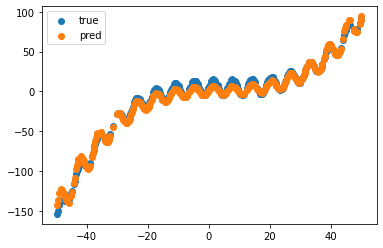

In [68]:
y_train_pred = model.predict(X_train)
plt.scatter(X_train, y_train, label='true')
plt.scatter(X_train, y_train_pred, label='pred')
plt.legend()
plt.show()

## symbolic regression vs Morse

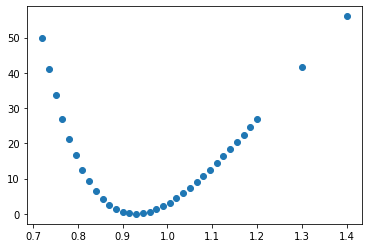

In [9]:
df = pd.DataFrame()
df['bond_length'] = bond_length
df['pred_e'] = pred_e
df['y'] = energy

plt.scatter(df.bond_length, df.y)
plt.show()

In [19]:
X = df[['bond_length', 'pred_e']]
# X = df[['bond_length']]
y = df['y']

In [92]:
def gauss(x1):
    return np.power(np.e, -x1**2)
gauss = make_function(function=gauss,name='gauss',arity=1)

function_set = ['add', 'sub', 'mul', 'div', 'neg', 'inv', gauss]

model = SymbolicRegressor(
    population_size=5000,
    function_set=function_set,
    generations=40,
    stopping_criteria=0.01,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    # parsimony_coefficient=0.01,
    parsimony_coefficient=0.035,
    random_state=0,
    feature_names=X.columns,
    metric='mse'
)

In [93]:
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'neg': lambda x    : -x,
    'inv': lambda x: 1/x,
    'gauss': lambda x: np.power(np.e, -x**2)
}

In [94]:
model.fit(X, y)
print('R2:', model.score(X, y))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/Users/ozone/opt/miniconda3/envs/molclub/lib/python3.10/site-packages/gplearn/functions.py:144: RuntimeWarning: overflow encountered in true_divide
  return np.where(np.abs(x1) > 0.001, 1. / x1, 0.)
/Users/ozone/opt/miniconda3/envs/molclub/lib/python3.10/site-packages/gplearn/functions.py:127: RuntimeWarning: overflow encountered in true_divide
  return np.where(np.abs(x2) > 0.001, np.divide(x1, x2), 1.)


   0    16.41      2.64955e+13       16          3.53093          4.63078     52.90s
   1    12.69      3.02598e+06       20          3.34232          5.53947     51.18s
   2    11.22           158456       14          2.94077          15.9682     48.22s
   3    12.67       4.9019e+07       11          2.63315          14.3409     46.48s
   4     9.07          23845.4       15          2.73108          13.5383     43.12s
   5     6.30      3.18826e+06       15          2.52765          18.1942     39.51s
   6     5.44       6.9593e+07       17          2.45937          9.35157     38.95s
   7     5.07          15765.6       15          2.57779          8.43377     39.23s
   8     4.75           135300        8          2.63201          17.0191     36.53s
   9     4.51           280032       15          2.56379          8.54231     33.91s
  10     4.54           216789       15          2.61751          8.12595     42.53s
  11     4.38           273999        5          2.75447         

In [96]:
next_e = sympy.sympify(str((model._program)), locals=converter)
next_e

2.71828182845905**(0.088804/bond_length**2)*(bond_length**6 + pred_e)

In [77]:
# parsimony = 0.03, MSE = 5
next_e

2.71828182845905**(0.097344/bond_length**2)*(bond_length**7 + pred_e)

In [98]:
# parsimony = 0.035, MSE = 3.36
next_e

2.71828182845905**(0.088804/bond_length**2)*(bond_length**6 + pred_e)

In [84]:
# parsimony = 0.04, MSE = 4
next_e

1.17370892018779*pred_e + 0.446

3.3609848337759276


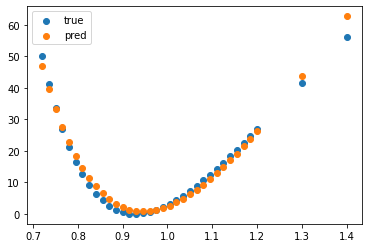

In [97]:
y_pred = model.predict(X)
print(mean_squared_error(y, y_pred))

plt.clf()
plt.scatter(X.bond_length, y, label='true')
plt.scatter(X.bond_length, y_pred, label='pred')
plt.legend()
plt.show()